閾値決定手法の紹介
===

In [70]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 画像の読み込み

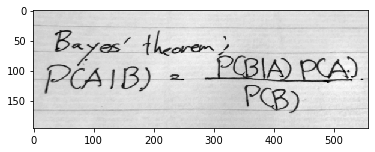

In [101]:
# グレースケール画像で読み込み
img = cv2.imread('img/main.png',0)
plt.imshow(img,cmap = "gray")

## ヒストグラムの表示

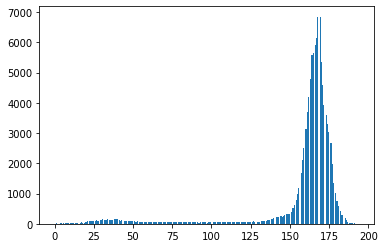

In [102]:
data = img.reshape(-1)
plt.hist(data,bins=256)
plt.show()

## 大津法(Otsu's method)
特徴：
- 計算が簡単
- ヒストグラムに変える必要がないため，binsなどの設定に依存しない


In [121]:
# Define Otsu scoring function
def OtsuScore(data,thresh):
    w_0 = np.sum(data<=thresh)/data.shape[0]
    w_1 = np.sum(data>thresh)/data.shape[0]
    # check ideal case    
    if (w_0 ==0) | (w_1 == 0):
        return 0
    mean_all = data.mean()
    mean_0 = data[data<=thresh].mean()
    mean_1 = data[data>thresh].mean()
    sigma2_b =  w_0 *((mean_0 - mean_all)**2) + w_1 *((mean_1 - mean_all)**2)

    return sigma2_b



In [133]:
# Callculation of Otsu score and analyze the optimal
scores_otsu =  np.zeros(256)
for i in range(scores_otsu.shape[0]):
    scores_otsu[i] = OtsuScore(data,i)
thresh_otsu = np.argmax(scores_otsu)

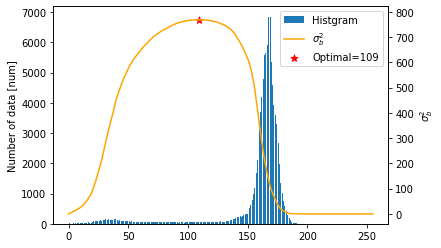

In [255]:
# visualization 
fig = plt.figure()
ax1 = fig.add_subplot()
ax2 = ax1.twinx()
ax1.hist(data,bins=256,label='Histgram')
ax2.plot(scores_otsu,label='$\sigma_b^2$',color = 'orange')
ax2.scatter([thresh_otsu],[scores_otsu[thresh_otsu]],s = 50,marker= '*',color = 'red',label='Optimal={0:d}'.format(thresh_otsu))
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)
ax1.set_ylabel('Number of data [num]')
ax2.set_ylabel('$\sigma_b^2$')
plt.show()


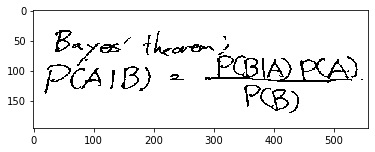

In [143]:
plt.imshow(img<thresh_otsu,cmap = 'Greys')

## Sezanによる手法
特徴：
 - 調整するハイパーパラメータが多い
 - 状況に合わせて使い分けることができる


## 情報量最小化
特徴
- データの特徴に依存しない(画像だと，バックグラウンドとシグナルの山が2つあるなど)


In [229]:
def InfoScore(data,thresh,bins=256):
    num_hist, range_hist = np.histogram(data, bins= bins)
    mean_hist = (range_hist[1:] + range_hist[:-1]) / 2
    p = num_hist/num_hist.sum()
    N = p.shape[0]
    M = np.sum(mean_hist>thresh)
    if M== 0:
        return np.inf
    q = np.zeros(N)
    q[mean_hist>thresh] = 1 / M
    Dqp = - np.log(M)  - np.sum(q*np.log(p))
    return Dqp

In [252]:
# Callculation of Otsu score and analyze the optimal
scores_info =  np.zeros(256)
for i in range(scores_info.shape[0]):
    scores_info[i] = InfoScore(data,i,bins = 180)
thresh_info = np.argmin(scores_info)

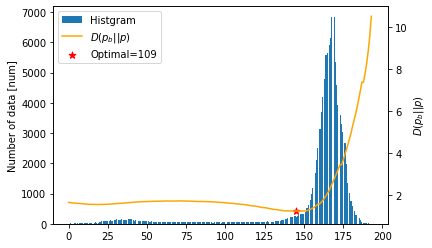

In [256]:
# visualization 
fig = plt.figure()
ax1 = fig.add_subplot()
ax2 = ax1.twinx()
ax1.hist(data,bins=256,label='Histgram')
ax2.plot(scores_info,label='$D(p_b||p)$',color = 'orange')
ax2.scatter([thresh_info],[scores_info[thresh_info]],s = 50,marker= '*',color = 'red',label='Optimal={0:d}'.format(thresh_otsu))
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)
ax1.set_ylabel('Number of data [num]')
ax2.set_ylabel('$D(p_b||p)$')
plt.show()

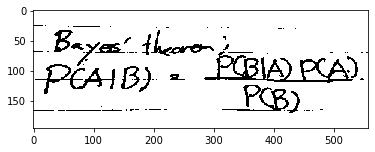

In [257]:
plt.imshow(img<thresh_info,cmap = 'Greys')